# Import Dependencies

In [1]:
import numpy as np
from tqdm import tqdm
from datetime import datetime
import pdb
import matplotlib.pyplot as plt
%matplotlib inline

# K-Means Class Definition

In [1]:
class Kmeans:
    
    def __init__(self, X, **kwargs):
        self.X = X
        self.N,self.D = X.shape
        self._set_options(**kwargs)
    
    def _set_options(self, **kwargs):
        self.beta = kwargs['beta'] if 'beta' in kwargs else 1
        self.epochs = kwargs['epochs'] if 'epochs' in kwargs else 30
        self.threshold = kwargs['threshold'] if 'threshold' in kwargs else 1e-2

    def distance2(self):
        self.D2 = np.sum( ( self.X - self.m.reshape([self.K,1,self.D]) )**2 , axis=2 )
    
    def responsibility(self):
        eD = np.exp( -self.beta * self.D2 )
        self.R = eD / eD.sum(axis=0)
    
    def mean(self):
        return (self.R @ self.X) / self.R.sum(axis=1, keepdims=True)
    
    def distortion(self):
        return (self.R * self.D2).sum()
    
    def fit(self, K):
        
        # start off with some random centroids
        idx = np.random.permutation(self.N)[:K]
        self.m = self.X.copy()[idx,:]
        
        # assign K
        self.K = K
        
        self.J = []

        for epoch in range(self.epochs):
            
            self.distance2() # update squared euclidean distance
            self.responsibility() # update responsability

            m = self.mean() # get new mean
            dist = np.sqrt( np.sum( (self.m - m)**2 , axis=1 ) ) # find the distance between saved mean and new mean
            if np.all(dist < self.threshold): break # if distances for all K means are less than the threshold, stop early
            self.m = m # save new means
            
            self.J.append( self.distortion() )

# Simulate Data

In [3]:
D,K = 2,3
N = int(1e3*K)

X0 = np.random.randn(N//K,D) + np.array([2,2])
X1 = np.random.randn(N//K,D) + np.array([2,-2])
X2 = np.random.randn(N//K,D) + np.array([-2,0])
X = np.vstack((X0,X1,X2))

# Instantiate K-Means and Time Fit

In [4]:
kmeans = Kmeans(X)

In [5]:
t0 = datetime.now()
kmeans.fit(3)
dt = datetime.now() - t0
print(f"Time: {dt}")

Time: 0:00:00.003120


# Scatter Plot

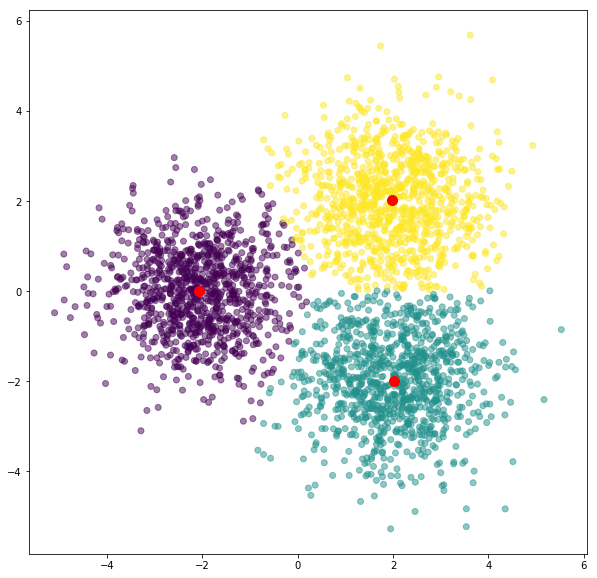

In [6]:
fig = plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], alpha=.5, c=kmeans.R.argmax(axis=0))
plt.scatter(kmeans.m[:,0], kmeans.m[:,1], s=100, c='r')
# kmeans.R.shape

# Distortion Plot

Text(0.5, 1.0, 'Distortion for k = 3')

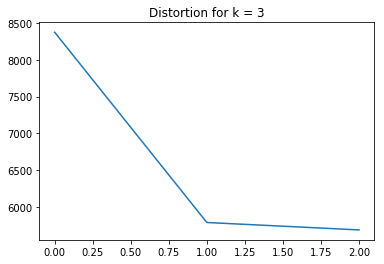

In [7]:
plt.plot(kmeans.J)
plt.title("Distortion for k = 3")

# Elbow Plot

Text(0.5, 1.0, 'Elbow Plot')

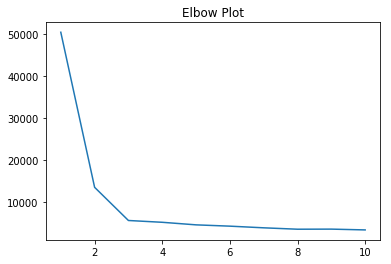

In [8]:
J = np.zeros(10)
K = np.arange(1,11)
for i,k in enumerate(K):
    kmeans.fit(k)
    J[i] = kmeans.J[-1]

plt.plot(K,J)
plt.title("Elbow Plot")